# Getting Started

1. I have used colab because the second part of the Assignment was taking a lot of time on my computer.
2. I have included all the graphs in output cells. You do not need to run the cells.
3. I have included explaination/inferences in text boxes. 4. This notebook is organized properly. You can navigate seamlessly through the table of contents on the left hand side of the screen.

Thank You

# Part A

## Setting Up

In [ ]:
!git clone https://github.com/cs60021SDM/LargeScaleML.git

Cloning into 'LargeScaleML'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 26 (delta 10), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (26/26), done.


In [ ]:
%cd LargeScaleML

/content/LargeScaleML


In [ ]:
import sys
import matplotlib.pyplot as plt
import random
import time
import numpy as np
from sklearn import metrics
from math import sqrt
from sklearn.model_selection import train_test_split

## Dataset Loading

In [ ]:
data = np.loadtxt('LinearRegdata.txt')
x = data[:, 1]
y = data[:, 2]

for i in range(0,5):
  print("x[",i,"] = ",x[i],",","y[",i,"] = ",y[i])

x[ 0 ] =  0.067732 , y[ 0 ] =  3.176513
x[ 1 ] =  0.42781 , y[ 1 ] =  3.816464
x[ 2 ] =  0.995731 , y[ 2 ] =  4.550095
x[ 3 ] =  0.738336 , y[ 3 ] =  4.256571
x[ 4 ] =  0.981083 , y[ 4 ] =  4.560815


In [ ]:
x_max = max(x)
x_min = min(x)
y_max = max(y)
y_min = min(y)
for i in range(0, len(x)):
    x[i] = (x[i] - x_min)/(x_max - x_min)
    y[i] = (y[i] - y_min)/(y_max - y_min)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=109)

## Handy Functions

In [ ]:
def diffa(y, ypred,x):
    return (y-ypred)*(-x)

def diffb(y, ypred):
    return (y-ypred)*(-1)

In [ ]:
def calc_grads(a, b, X_train, y_train):
    loss = 0
    losst = 0
    all_da = 0
    all_db = 0
    for i in range(0, len(X_train)):
        y_pred = a*X_train[i] + b
        loss = loss + (y_train[i] - y_pred)*(y_train[i] - y_pred)/2
        all_da = all_da + diffa(y_train[i], y_pred, X_train[i]) #gradients accumulated
        all_db = all_db + diffb(y_train[i], y_pred) #gradients accumulated

    loss = loss/len(X_train)
    return (all_da, all_db, loss)

In [ ]:
def apply_grads(a, b, da, db, rate):
    return (a - rate * da, b - rate * db)

In [ ]:
def calc_test_loss(a, b, X_test, y_test):
    losst = 0
    for i in range(0, len(X_test)):
        y_pred = a*X_test[i] + b
        losst = losst + (y_test[i] - y_pred)*(y_test[i] - y_pred)/2
    return losst/len(X_test)

## Constants Declarations

In [ ]:
NUM_EPOCHS = 100

## Batch Gradient Descent

In [ ]:
def batch_gd(X_train, y_train, X_test, y_test):

    a = 10.0
    b = -20.0
    rate = 0.008

    best_a = None
    best_b = None
    losses = []
    step_losses = []

    prevloss = 1e9
    num_updates = 0

    for ep in range(0, NUM_EPOCHS):

        (da, db, loss) = calc_grads(a, b, X_train, y_train)
        (a, b) = apply_grads(a, b, da, db, rate)
        losst = calc_test_loss(a, b, X_test, y_test)

        losses.append(loss)
        step_losses.append(loss)
        num_updates += 1
        
        if losst<prevloss:
            prevloss=losst
            best_a = a
            best_b = b

    rms_error = sqrt(calc_test_loss(a, b, X_test, y_test))
    return ((list(range(0, NUM_EPOCHS)), losses), (list(range(0, num_updates)), step_losses), rms_error)

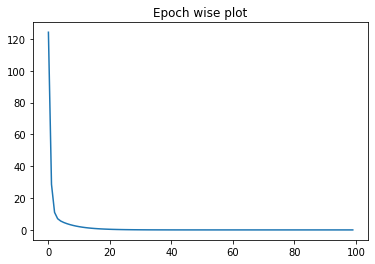

In [ ]:
batch_gd_res = batch_gd(X_train, y_train, X_test, y_test)
plt.title("Epoch wise plot")
plt.plot(batch_gd_res[0][0], batch_gd_res[0][1])

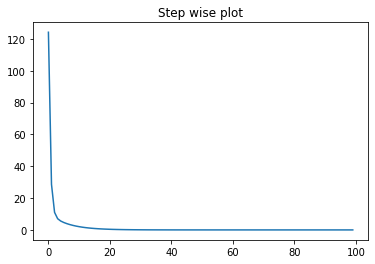

In [ ]:
plt.title("Step wise plot")
plt.plot(batch_gd_res[1][0], batch_gd_res[1][1])

#### Explaination
The epoch wise plot is the same as the step wise plot, because we update all the variables in one step for the entire dataset.

## Mini Batch Gradient Descent

In [ ]:
def shuffle_data(x,y):
    # shuffle x，y，while keeping x_i corresponding to y_i
    seed = random.random()
    random.seed(seed)
    random.shuffle(x)
    random.seed(seed)
    random.shuffle(y)

def minibatch_gd(X_train, y_train, X_test, y_test):
    a = 10.0
    b = -20.0
    rate = 0.002
    batch_size = 10

    NUM_BATCHES = int(len(X_train)/batch_size)

    best_a = None
    best_b = None
    losses = []
    step_losses = []

    prevloss = 1e9
    num_updates = 0

    for ep in range(0, NUM_EPOCHS):
        loss = 0

        for batch in range(0, NUM_BATCHES):
            shuffle_data(x, y)
            X_batch = x[0:batch_size]
            y_batch = y[0:batch_size]

            (da, db, loss_batch) = calc_grads(a, b, X_batch, y_batch)
            (a, b) = apply_grads(a, b, da, db, rate)
            losst = calc_test_loss(a, b, X_test, y_test)

            loss += loss_batch
            step_losses.append(loss_batch)
            num_updates += 1

            if losst<prevloss:
                prevloss=losst
                best_a = a
                best_b = b

        loss = loss/NUM_BATCHES
        losses.append(loss)

    rms_error = sqrt(calc_test_loss(a, b, X_test, y_test))
    return ((list(range(0, NUM_EPOCHS)), losses), (list(range(0, num_updates)), step_losses), rms_error)

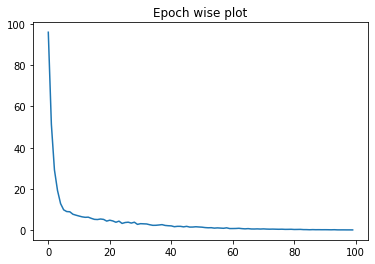

In [ ]:
minibatch_gd_res = minibatch_gd(X_train, y_train, X_test, y_test)
plt.title("Epoch wise plot")
plt.plot(minibatch_gd_res[0][0], minibatch_gd_res[0][1])

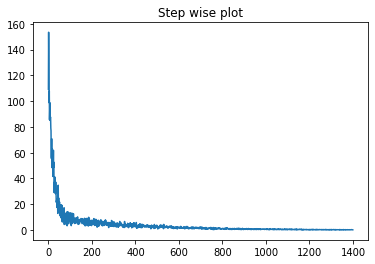

In [ ]:
plt.title("Step wise plot")
plt.plot(minibatch_gd_res[1][0], minibatch_gd_res[1][1])

#### Explaination
The step wise plot is jittery as expected, while the averaged epoch wise plot is smooth. Both are decreasing overall.

## Stochastic Gradient Descent

In [ ]:
def stochastic_gd(X_train, y_train, X_test, y_test):
    a = 10.0
    b = -20.0
    rate = 0.02

    best_a = None
    best_b = None
    losses = []
    step_losses = []

    prevloss = 1e9
    num_updates = 0

    for ep in range(0, NUM_EPOCHS):
        loss = 0

        for i in range(0, len(X_train)):

            (da, db, loss_i) = calc_grads(a, b, [X_train[i]], [y_train[i]])
            (a, b) = apply_grads(a, b, da, db, rate)
            losst = calc_test_loss(a, b, X_test, y_test)

            step_losses.append(loss_i)
            num_updates += 1

            loss += loss_i

            if losst<prevloss:
                prevloss=losst
                best_a = a
                best_b = b

        loss = loss/len(X_train)
        losses.append(loss)

    rms_error = sqrt(calc_test_loss(a, b, X_test, y_test))
    return ((list(range(0, NUM_EPOCHS)), losses), (list(range(0, num_updates)), step_losses), rms_error)

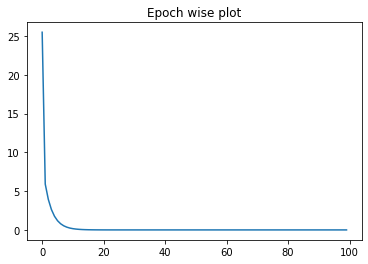

In [ ]:
stochastic_gd_res = stochastic_gd(X_train, y_train, X_test, y_test)
plt.title("Epoch wise plot")
plt.plot(stochastic_gd_res[0][0], stochastic_gd_res[0][1])

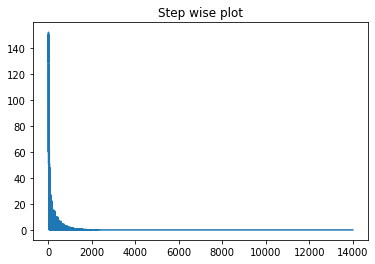

In [ ]:
plt.title("Step wise plot")
plt.plot(stochastic_gd_res[1][0], stochastic_gd_res[1][1])

#### Explaination
We see that the step wise plot is very jittery compared to minibatch, because of many more step updates. The averaged epoch wise loss plot is smooth but less steeper than minibatch, whcih is expected.

## Momentum Gradient Descent

In [ ]:
def momentum_gd(X_train, y_train, X_test, y_test):

    a = 10.0
    b = -20.0
    rate = 0.02
    dva = 0
    dvb = 0
    gamma = 0.9

    best_a = None
    best_b = None
    losses = []
    step_losses = []

    prevloss = 1e9
    num_updates = 0

    for ep in range(0, NUM_EPOCHS):

        (da, db, loss) = calc_grads(a, b, X_train, y_train)

        dva = gamma * dva + da
        dvb = gamma * dvb + db

        (a, b) = apply_grads(a, b, dva, dvb, rate)
        losst = calc_test_loss(a, b, X_test, y_test)

        losses.append(loss)
        step_losses.append(loss)
        num_updates += 1
        
        if losst<prevloss:
            prevloss=losst
            best_a = a
            best_b = b

    rms_error = sqrt(calc_test_loss(a, b, X_test, y_test))
    return ((list(range(0, NUM_EPOCHS)), losses), (list(range(0, num_updates)), step_losses), rms_error)

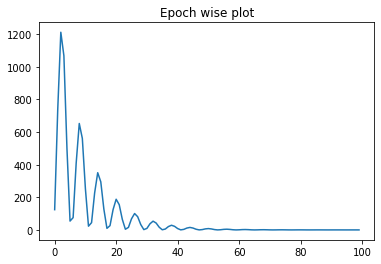

In [ ]:
momentum_gd_res = momentum_gd(X_train, y_train, X_test, y_test)
plt.title("Epoch wise plot")
plt.plot(momentum_gd_res[0][0], momentum_gd_res[0][1])

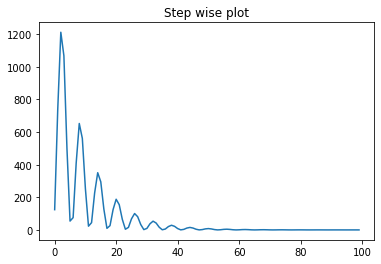

In [ ]:
plt.title("Step wise plot")
plt.plot(momentum_gd_res[1][0], momentum_gd_res[1][1])

#### Explaination
Here, we get the typical wavy plot because of momentum.

## Adam Gradient Descent

In [ ]:
def adam_gd(X_train, y_train, X_test, y_test):
    a = 10.0
    b = -20.0
    rate = 0.2
    epsilon = 1e-7
    
    vda = 0
    vdb = 0

    sda = 0
    sdb = 0

    beta1 = 0.9
    beta2 = 0.999

    beta1_t = 1
    beta2_t = 1

    best_a = None
    best_b = None
    losses = []
    step_losses = []

    prevloss = 1e9
    num_updates = 0

    for ep in range(0, NUM_EPOCHS):

        (da, db, loss) = calc_grads(a, b, X_train, y_train)

        vda = beta1 * vda + (1 - beta1) * da
        vdb = beta1 * vdb + (1 - beta1) * db

        sda = beta2 * sda + (1 - beta2) * da * da
        sdb = beta2 * sdb + (1 - beta2) * db * db

        beta1_t = beta1_t * beta1
        beta2_t = beta2_t * beta2

        vda_corr = vda / (1 - beta1_t)
        vdb_corr = vdb / (1 - beta1_t)

        sda_corr = sda / (1 - beta2_t)
        sdb_corr = sdb / (1 - beta2_t)

        da_adam = vda_corr / (sqrt(sda_corr) + epsilon)
        db_adam = vdb_corr / (sqrt(sdb_corr) + epsilon)

        (a, b) = apply_grads(a, b, da_adam, db_adam, rate)
        losst = calc_test_loss(a, b, X_test, y_test)

        losses.append(loss)
        step_losses.append(loss)
        num_updates += 1
        
        if losst<prevloss:
            prevloss=losst
            best_a = a
            best_b = b

    rms_error = sqrt(calc_test_loss(a, b, X_test, y_test))
    return ((list(range(0, NUM_EPOCHS)), losses), (list(range(0, num_updates)), step_losses), rms_error)

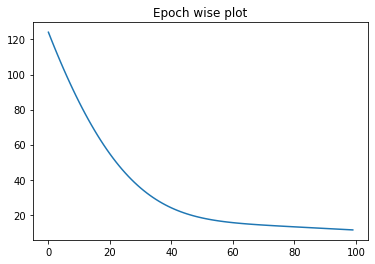

In [ ]:
adam_gd_res = adam_gd(X_train, y_train, X_test, y_test)
plt.title("Epoch wise plot")
plt.plot(adam_gd_res[0][0], adam_gd_res[0][1])

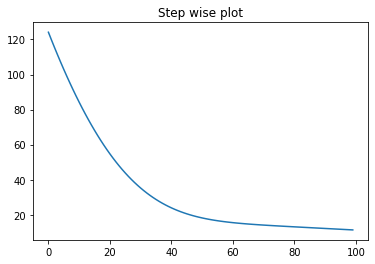

In [ ]:
plt.title("Step wise plot")
plt.plot(adam_gd_res[1][0], adam_gd_res[1][1])

#### Explaination
The plot is much less steeper in the beginning as compared to the other methods. Also, we get the same plot because one step = one epoch, since we are using the entire dataset.

## Comparison

<BarContainer object of 5 artists>

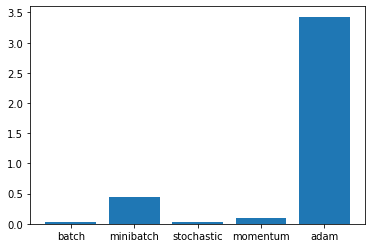

In [ ]:
plt.bar(["batch", "minibatch", "stochastic", "momentum", "adam"], 
        [batch_gd_res[2], minibatch_gd_res[2], stochastic_gd_res[2], momentum_gd_res[2], adam_gd_res[2]])

#### Explaination
For the same no. of epochs it is expected for the batch gradient descent to perform better, which we see in the plot.

# Part B

## Setting Up

In [ ]:
import torch
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR

In [ ]:
no_cuda = False
use_cuda = not no_cuda and torch.cuda.is_available()
torch.manual_seed(1)
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
batch_size = 64

kwargs = {'batch_size': 64}
if use_cuda:
  kwargs.update({'num_workers': 1,
                       'pin_memory': True,
                       'shuffle': True},
                     )

cuda


## Data Loading

In [ ]:
transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])
dataset1 = datasets.MNIST('./', train=True, download=True,
                       transform=transform)
dataset2 = datasets.MNIST('./', train=False,
                       transform=transform)
train_loader = torch.utils.data.DataLoader(dataset1,**kwargs)
test_loader = torch.utils.data.DataLoader(dataset2, **kwargs)

images, labels = next(iter(train_loader))

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Model Defintion

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1) #in_channel x out_channel x kernel_size x stride
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

## Train Method

In [ ]:
def train(model, device, train_loader, optimizer, epoch):
    avg_loss = 0
    step_losses = []
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        avg_loss += loss.item()
        step_losses.append(loss.item())

        loss.backward()
        optimizer.step()
    
    return (step_losses, avg_loss/len(train_loader))

## Test Method

In [ ]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_acc = 100.0 * correct / len(test_loader.dataset)
    return (test_loss, test_acc)

## Evaluate Method

In [ ]:
def evaluate(optimizer):

    scheduler = StepLR(optimizer, step_size=1, gamma=0.2)

    min_loss = 1e7
    best_acc = None

    train_losses = []
    step_losses = []

    for epoch in range(0, 5):
        epoch_step_losses, train_loss = train(model, device, train_loader, optimizer, epoch)
        test_loss, test_acc = test(model, device, test_loader)

        train_losses.append(train_loss)
        step_losses.extend(epoch_step_losses)

        if test_loss < min_loss:
            min_loss = test_loss
            best_acc = test_acc

        scheduler.step()

    return (train_losses, step_losses, best_acc)

## Learning Rate = 0.002

### Mini Batch

In [ ]:
model = Net().to(device)
minibatch_res = evaluate(optim.SGD(model.parameters(), lr=0.002))

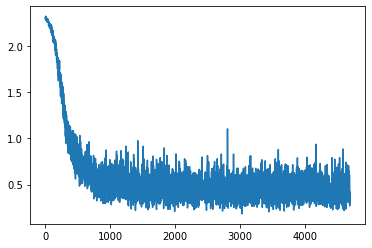

In [ ]:
plt.plot(list(range(0, len(minibatch_res[1]))), minibatch_res[1])

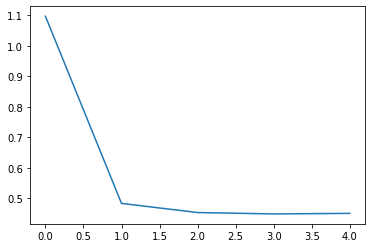

In [ ]:
plt.plot(list(range(0, len(minibatch_res[0]))), minibatch_res[0])

### Momentum

In [ ]:
model = Net().to(device)
momentum_res = evaluate(optim.SGD(model.parameters(), momentum=0.9, lr=0.002))

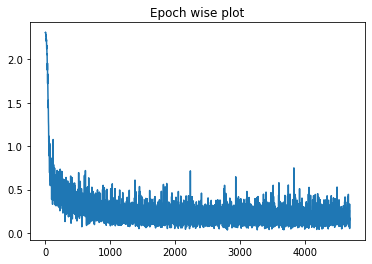

In [ ]:
plt.title("Epoch wise plot")
plt.plot(list(range(0, len(momentum_res[1]))), momentum_res[1])

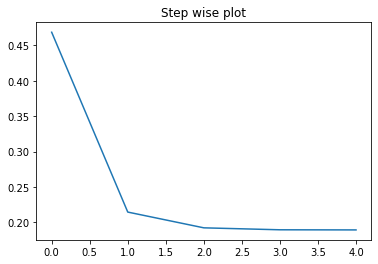

In [ ]:
plt.title("Step wise plot")
plt.plot(list(range(0, len(momentum_res[0]))), momentum_res[0])

### Nesterov

In [ ]:
model = Net().to(device)
nesterov_res = evaluate(optim.SGD(model.parameters(), momentum=0.9, nesterov=True, lr=0.002))

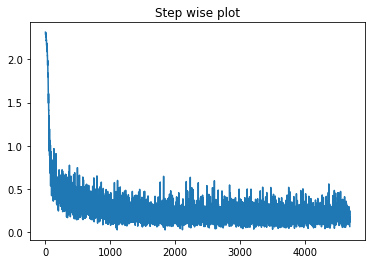

In [ ]:
plt.title("Step wise plot")
plt.plot(list(range(0, len(nesterov_res[1]))), nesterov_res[1])

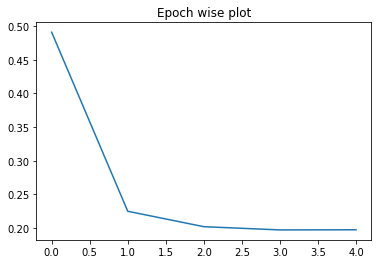

In [ ]:
plt.title("Epoch wise plot")
plt.plot(list(range(0, len(nesterov_res[0]))), nesterov_res[0])

### Adam

In [ ]:
model = Net().to(device)
adam_res = evaluate(optim.Adam(model.parameters(), lr=0.002))

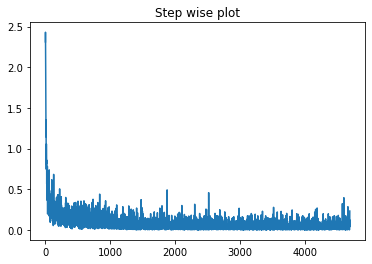

In [ ]:
plt.title("Step wise plot")
plt.plot(list(range(0, len(adam_res[1]))), adam_res[1])

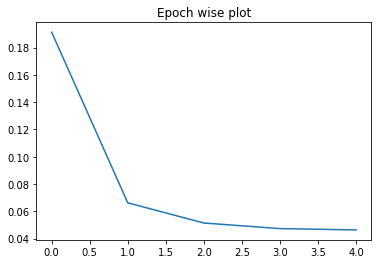

In [ ]:
plt.title("Epoch wise plot")
plt.plot(list(range(0, len(adam_res[0]))), adam_res[0])

### Comparison

<BarContainer object of 4 artists>

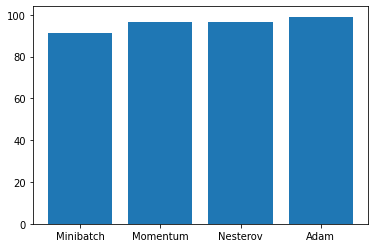

In [ ]:
plt.bar(["Minibatch", "Momentum", "Nesterov", "Adam"], [minibatch_res[2], momentum_res[2], nesterov_res[2], adam_res[2]])

## Learning Rate 0.02

### Mini Batch

In [ ]:
model = Net().to(device)
minibatch_res = evaluate(optim.SGD(model.parameters(), lr=0.02))

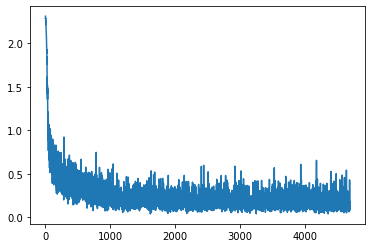

In [ ]:
plt.plot(list(range(0, len(minibatch_res[1]))), minibatch_res[1])

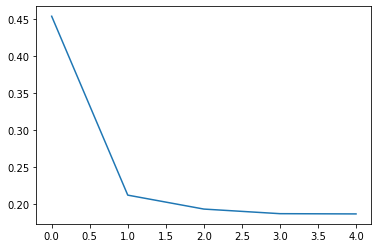

In [ ]:
plt.plot(list(range(0, len(minibatch_res[0]))), minibatch_res[0])

### Momentum

In [ ]:
model = Net().to(device)
momentum_res = evaluate(optim.SGD(model.parameters(), momentum=0.9, lr=0.02))

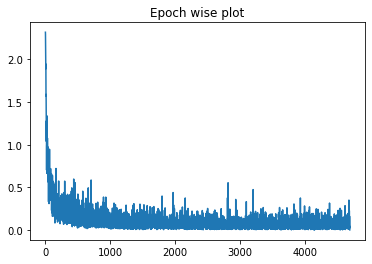

In [ ]:
plt.title("Epoch wise plot")
plt.plot(list(range(0, len(momentum_res[1]))), momentum_res[1])

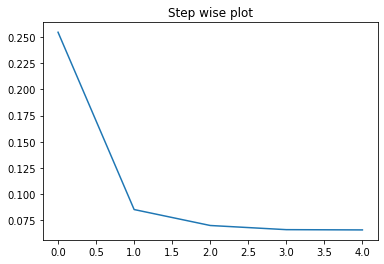

In [ ]:
plt.title("Step wise plot")
plt.plot(list(range(0, len(momentum_res[0]))), momentum_res[0])

### Nesterov

In [ ]:
model = Net().to(device)
nesterov_res = evaluate(optim.SGD(model.parameters(), momentum=0.9, nesterov=True, lr=0.02))

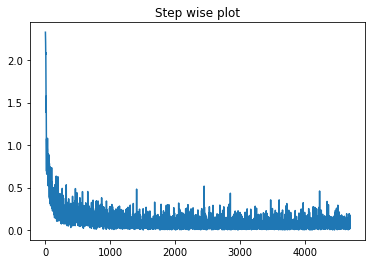

In [ ]:
plt.title("Step wise plot")
plt.plot(list(range(0, len(nesterov_res[1]))), nesterov_res[1])

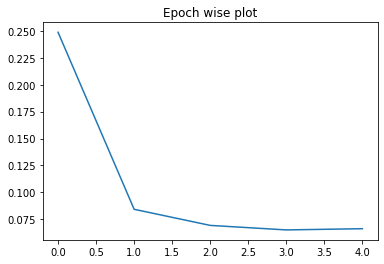

In [ ]:
plt.title("Epoch wise plot")
plt.plot(list(range(0, len(nesterov_res[0]))), nesterov_res[0])

### Adam

In [ ]:
model = Net().to(device)
adam_res = evaluate(optim.Adam(model.parameters(), lr=0.02))

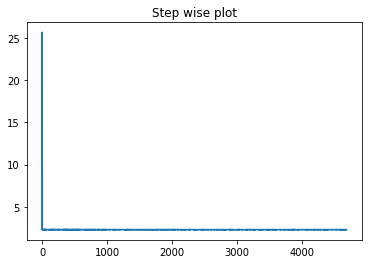

In [ ]:
plt.title("Step wise plot")
plt.plot(list(range(0, len(adam_res[1]))), adam_res[1])

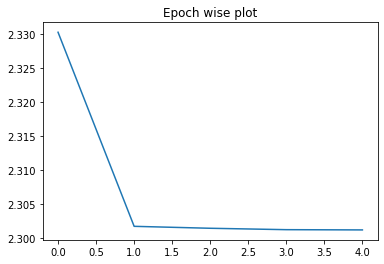

In [ ]:
plt.title("Epoch wise plot")
plt.plot(list(range(0, len(adam_res[0]))), adam_res[0])

### Comparison

<BarContainer object of 4 artists>

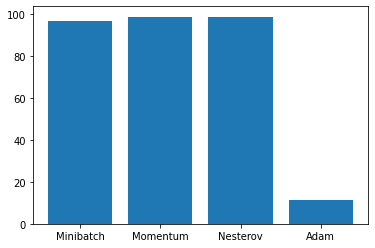

In [ ]:
plt.bar(["Minibatch", "Momentum", "Nesterov", "Adam"], [minibatch_res[2], momentum_res[2], nesterov_res[2], adam_res[2]])

## Learning Rate 0.2

### Mini Batch

In [ ]:
model = Net().to(device)
minibatch_res = evaluate(optim.SGD(model.parameters(), lr=0.2))

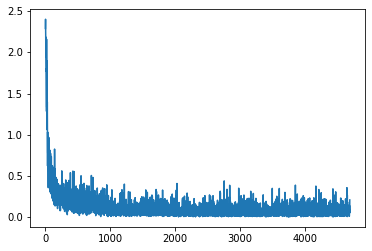

In [ ]:
plt.plot(list(range(0, len(minibatch_res[1]))), minibatch_res[1])

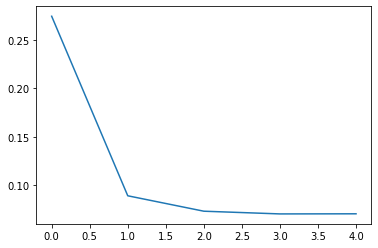

In [ ]:
plt.plot(list(range(0, len(minibatch_res[0]))), minibatch_res[0])

### Momentum

In [ ]:
model = Net().to(device)
momentum_res = evaluate(optim.SGD(model.parameters(), momentum=0.9, lr=0.2))

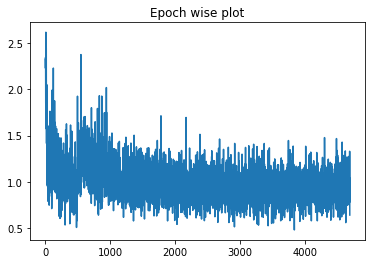

In [ ]:
plt.title("Epoch wise plot")
plt.plot(list(range(0, len(momentum_res[1]))), momentum_res[1])

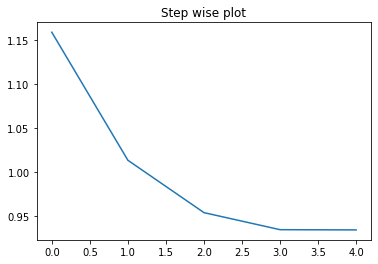

In [ ]:
plt.title("Step wise plot")
plt.plot(list(range(0, len(momentum_res[0]))), momentum_res[0])

### Nesterov

In [ ]:
model = Net().to(device)
nesterov_res = evaluate(optim.SGD(model.parameters(), momentum=0.9, nesterov=True, lr=0.2))

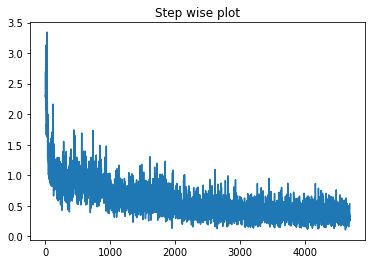

In [ ]:
plt.title("Step wise plot")
plt.plot(list(range(0, len(nesterov_res[1]))), nesterov_res[1])

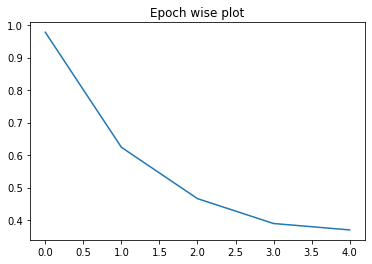

In [ ]:
plt.title("Epoch wise plot")
plt.plot(list(range(0, len(nesterov_res[0]))), nesterov_res[0])

### Adam

In [ ]:
model = Net().to(device)
adam_res = evaluate(optim.Adam(model.parameters(), lr=0.2))

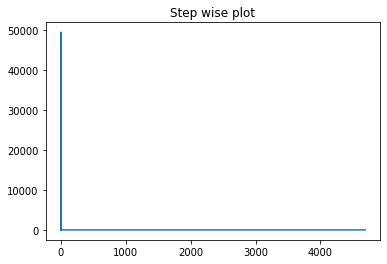

In [ ]:
plt.title("Step wise plot")
plt.plot(list(range(0, len(adam_res[1]))), adam_res[1])

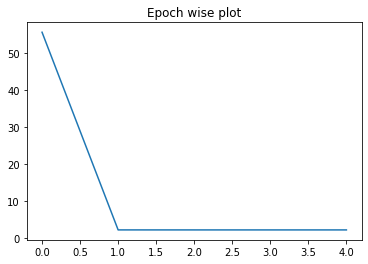

In [ ]:
plt.title("Epoch wise plot")
plt.plot(list(range(0, len(adam_res[0]))), adam_res[0])

### Comparison

<BarContainer object of 4 artists>

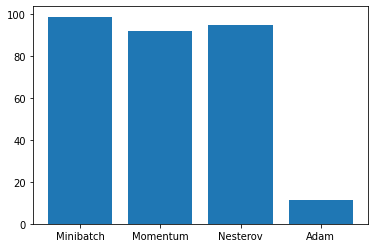

In [ ]:
plt.bar(["Minibatch", "Momentum", "Nesterov", "Adam"], [minibatch_res[2], momentum_res[2], nesterov_res[2], adam_res[2]])

## Explaination
As we increase the learning rate, the plots tend to become steeper as expected. Also with larger learning rate Adam starts to outperform the other methods.